In [2]:
import polars as pl
import matplotlib.pyplot as plt
file_path = r'C:\Users\ramya\Downloads\openpolicing.parquet'
lf = pl.scan_parquet(file_path)

Basic Question: Can geographic/location data show disparities in outcomes?

Do some counties conduct more searches than others?

In [ ]:
# creating a data frame that only contains the columns i am currently analyzing

clean = lf.select(['county_name', 'search_conducted']).drop_nulls().collect()
clean = clean.with_columns((pl.col('search_conducted') == 'TRUE').cast(pl.Int8).alias('search_conducted_int'))
clean


county_name,search_conducted,search_conducted_int
str,str,i8
"""Guilford County""","""FALSE""",0
"""Guilford County""","""FALSE""",0
"""Guilford County""","""FALSE""",0
"""Guilford County""","""FALSE""",0
"""Guilford County""","""FALSE""",0
…,…,…
"""Jackson County""","""FALSE""",0
"""Jackson County""","""FALSE""",0
"""Jackson County""","""FALSE""",0


In [ ]:
# where are searches being conducted the most?

temp = clean.filter(pl.col('search_conducted') == 'TRUE')
temp

county_name,search_conducted,search_conducted_int
str,str,i8
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
…,…,…
"""Wake County""","""TRUE""",1
"""Hoke County""","""TRUE""",1
"""Hoke County""","""TRUE""",1


In [ ]:
# summing up the number of searches per county using the .group_by() and .agg() to apply this to all the rows fast

search_true = temp.group_by('county_name').agg(pl.col('search_conducted_int').sum().alias('search_count'))
search_true

county_name,search_count
str,i64
"""Hertford County""",740
"""Hamilton County""",11557
"""Lorain County""",9923
"""Yolo""",4552
"""Davie County""",1198
…,…
"""St. Croix County""",204
"""Craven County""",3217
"""Kleberg County""",2243


([<matplotlib.patches.Wedge at 0x23d7e958390>,
 [Text(1.099991718494506, 0.004268400579047229, 'Hertford County'),
  Text(1.097430594821109, 0.07514046546693061, 'Hamilton County'),
  Text(1.0820308905529248, 0.19801300939393995, 'Lorain County'),
  Text(1.0639000331005215, 0.27949368430916216, 'Yolo'),
  Text(1.0549905664705066, 0.3114400498623124, 'Davie County'),
  Text(1.0473344312313764, 0.33628944253016574, 'Polk County'),
  Text(1.0302812122623808, 0.3853837355924082, 'Van Zandt County'),
  Text(1.0155641190868037, 0.4226458565080753, 'Defiance County'),
  Text(1.0127562587999375, 0.42933059553397124, 'Broadwater County'),
  Text(1.0103451344199101, 0.43497437781323844, 'Lampasas County'),
  Text(1.0076389967663966, 0.44120704005671774, 'Mineral County'),
  Text(0.9990900457974161, 0.46023806925168315, 'Hancock County'),
  Text(0.9814933813665686, 0.4966595839542612, 'Bexar County'),
  Text(0.9610552967488577, 0.5351380350815715, 'Kittitas County'),
  Text(0.9263333598085558, 0.

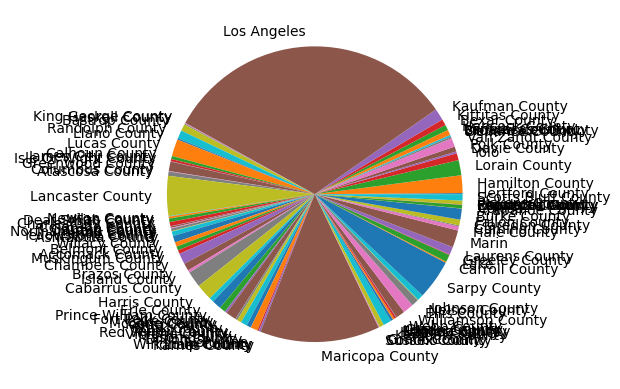

In [ ]:
# used a pie to sort of show the distribution of searches conducted in a sample 100 counties

county_name = search_true.select('county_name').slice(0,100).to_numpy().flatten()
search_count = search_true.select('search_count').slice(0,100).to_numpy().flatten()

plt.pie(search_count, labels=county_name)

In [ ]:
# now to further analyze i want to use the counties largest and smallest searches and look into why
# therefore, i used to .sort() to sort the dataframe from most searches to least

search_true = search_true.sort('search_count', descending=True)
search_true

county_name,search_count
str,i64
"""Mecklenburg County""",197173
"""Los Angeles""",193410
"""Wake County""",95799
"""Guilford County""",87160
"""Maricopa County""",78448
…,…
"""Sedgwick County""",1
"""Treasure County""",1
"""Teton County""",1


<BarContainer object of 4 artists>

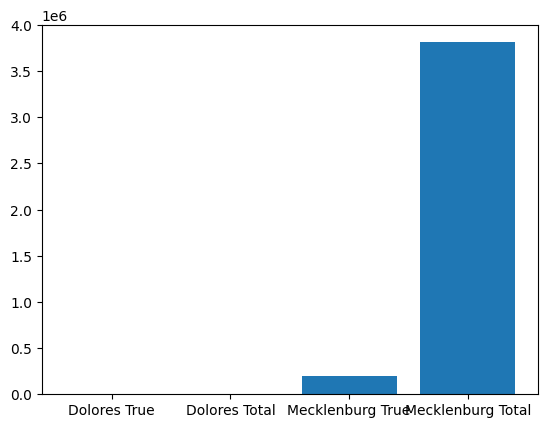

In [ ]:
# i picked the county with the most and least searches and tried to compare the total rows and the searches per each county
# the comparison is so large you can't see the number of searchest for the county with the lowest but it does in fact exist

dolores_county = clean.filter(pl.col('county_name') == 'Dolores County')
mecklenburg_county = clean.filter(pl.col('county_name') == 'Mecklenburg County')
dolores_acc = dolores_county.shape[0]
dolores_search = search_true.filter(pl.col('county_name') == 'Dolores County').select('search_count').to_numpy().item()
mecklenburg_acc = mecklenburg_county.shape[0]
mecklenburg_search = search_true.filter(pl.col('county_name') == 'Mecklenburg County').select('search_count').to_numpy().item()

labels = ['Dolores True', 'Dolores Total', 'Mecklenburg True', 'Mecklenburg Total']
data = [dolores_search, dolores_acc, mecklenburg_search, mecklenburg_acc]

plt.bar(labels, data)

<BarContainer object of 2 artists>

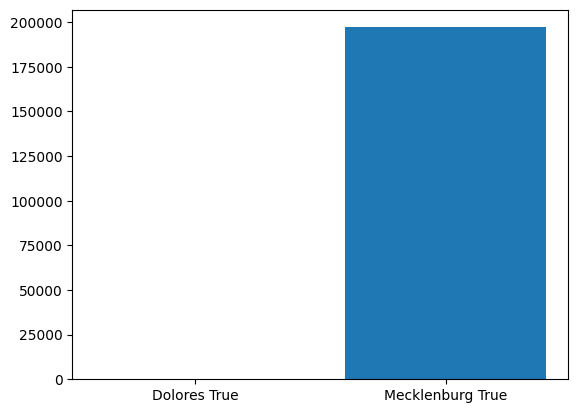

In [ ]:
labels = ['Dolores True', 'Mecklenburg True']
data = [dolores_search, mecklenburg_search]

plt.bar(labels, data)

([<matplotlib.patches.Wedge at 0x23d84135790>,
 [Text(1.0999963316547765, 0.002840835446673645, 'Dolores Total'),
  Text(-1.0999963314930687, -0.0028408980606270846, 'Mecklenburg Total')])

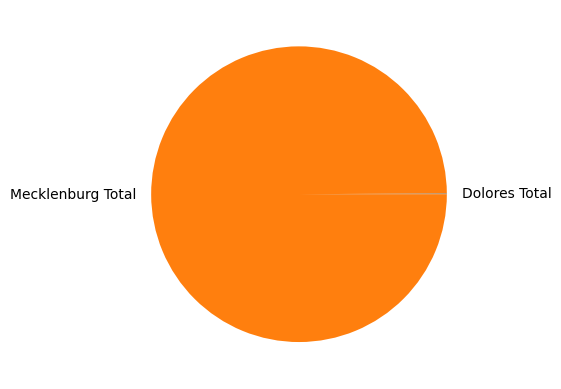

In [29]:
labels = ['Dolores Total', 'Mecklenburg Total']
data = [dolores_acc, mecklenburg_acc]

plt.pie(data, labels=labels)

MOST SEARCHES: Mecklenburg County (197,173), Los Angeles (193,410), Wake County (95,799), Guilford County (87,160)


LEAST SEARCHES: Treasure County (1), Teton County (1), Bent County (1), Dolores County (1)

In [3]:
# what types of searches were most conducted in the counties with the most searches?

clean = lf.select(['county_name', 'search_conducted', 'search_person', 'search_vehicle']).drop_nulls().collect()
clean

county_name,search_conducted,search_person,search_vehicle
str,str,str,str
"""Guilford County""","""FALSE""","""FALSE""","""FALSE"""
"""Guilford County""","""FALSE""","""FALSE""","""FALSE"""
"""Guilford County""","""FALSE""","""FALSE""","""FALSE"""
"""Guilford County""","""FALSE""","""FALSE""","""FALSE"""
"""Guilford County""","""FALSE""","""FALSE""","""FALSE"""
…,…,…,…
"""Jackson County""","""FALSE""","""FALSE""","""FALSE"""
"""Jackson County""","""FALSE""","""FALSE""","""FALSE"""
"""Jackson County""","""FALSE""","""FALSE""","""FALSE"""


In [9]:
search_types = clean.group_by('county_name').agg(
    (pl.col('search_person') == 'TRUE').sum().alias('person_count'),
    (pl.col('search_vehicle') == 'TRUE').sum().alias('vehicle_count')
)
search_types

county_name,person_count,vehicle_count
str,u32,u32
"""Horry County""",22743,14619
"""Chesterfield County""",2268,1838
"""Gates County""",172,267
"""Walworth County""",21,23
"""Lancaster County""",5445,4737
…,…,…
"""0 County""",0,0
"""Cherokee County""",7081,6377
"""Darlington County""",6701,5574


Text(0.5, 1.0, 'Mecklenburg Search Types')

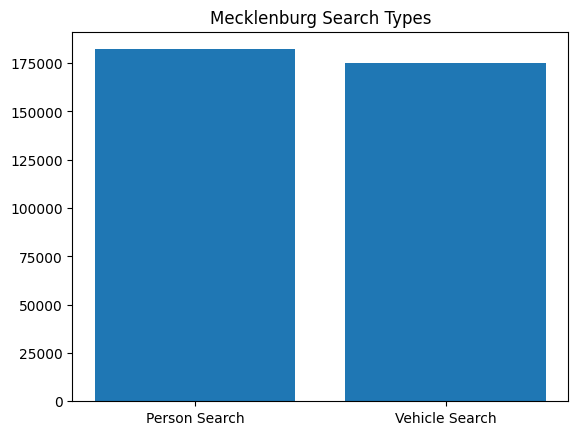

In [14]:
meck_county = search_types.filter(pl.col('county_name') == 'Mecklenburg County')
meck_person_count = meck_county.select('person_count').to_numpy().item()
meck_vehicle_count = meck_county.select('vehicle_count').to_numpy().item()

plt.bar(['Person Search', 'Vehicle Search'], [meck_person_count, meck_vehicle_count])
plt.title('Mecklenburg Search Types')

Text(0.5, 1.0, 'Wake County Search Types')

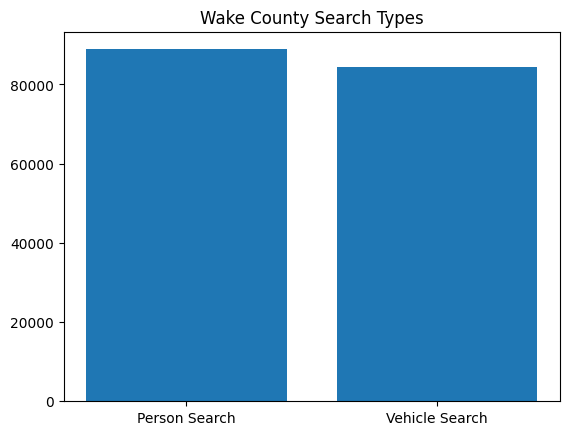

In [22]:
wake_county = search_types.filter(pl.col('county_name') == 'Wake County')
wake_person_count = wake_county.select('person_count').to_numpy().item()
wake_vehicle_count = wake_county.select('vehicle_count').to_numpy().item()

plt.bar(['Person Search', 'Vehicle Search'], [wake_person_count, wake_vehicle_count])
plt.title('Wake County Search Types')

Text(0.5, 1.0, 'Guilford County Search Types')

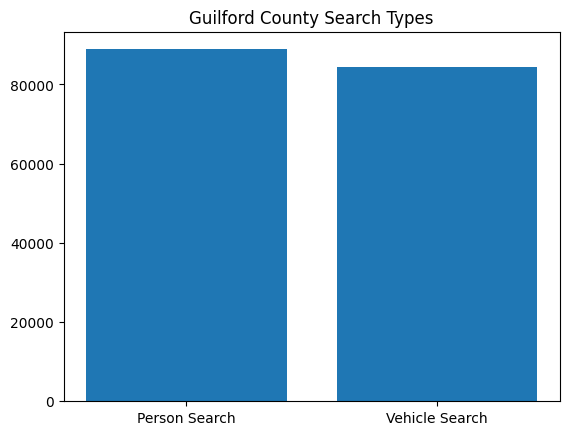

In [23]:
guil_county = search_types.filter(pl.col('county_name') == 'Wake County')
guil_person_count = guil_county.select('person_count').to_numpy().item()
guil_vehicle_count = guil_county.select('vehicle_count').to_numpy().item()

plt.bar(['Person Search', 'Vehicle Search'], [guil_person_count, guil_vehicle_count])
plt.title('Guilford County Search Types')

In [27]:
# los angeles has no cells which is interesting

la = search_types.filter(pl.col('county_name') == 'Los Angeles')
la

county_name,person_count,vehicle_count
str,u32,u32


In [28]:
la_cells = lf.filter(pl.col('county_name') == 'Los Angeles').collect()
la_cells

date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,violation,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,service_area,officer_race,lat,lng,geocode_source,beat,division,officer_sex,disposition,posted_speed,district,precinct,speed,contraband_other,vehicle_type,officer_age,officer_years_of_service,unit,notes,sector,subsector,officer_assignment,use_of_force_description,department_id,contraband_alcohol,zone,region,neighborhood,reporting_area,reason_for_arrest,subdistrict,police_grid_number,use_of_force_reason,charged_speed,subdivision,substation
date,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f32,f32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2009-07-04,null,null,"""Los Angeles""",null,"""hispanic""","""male""",null,"""California Highway Patrol""","""vehicular""","""FALSE""","""FALSE""","""FALSE""","""summons""",null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Mechanical or Nonmoving Violat…","""Mechanical or Nonmoving Violat…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""white""","""male""",null,"""California Highway Patrol""","""vehicular""","""FALSE""","""FALSE""","""FALSE""","""summons""",null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Moving Violation (VC)""","""Moving Violation (VC)""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""hispanic""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""black""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""black""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2016-06-30,null,null,"""Los Angeles""",null,"""asian/pacific islander""","""male""",null,"""California Highway Patrol""","""vehicular""","""TRUE""","""FALSE""","""FALSE""","""arrest""",null,null,null,null,"""

In [ ]:
options = {}
columns = ['search_person', 'search_vehicle']
